In [ ]:
!pip install pandas==<1.5.3>


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install pandas==<1.5.3>'


# Downloading the data

## Health Story Content



In [ ]:
# Download entire dataset from github as a ZIP file (including HealthRelease)

import requests

url = "https://github.com/EnyanDai/FakeHealth/archive/refs/heads/master.zip"
response = requests.get(url)

# Save the ZIP file
with open("FakeHealth.zip", "wb") as file:
    file.write(response.content)

In [ ]:
import zipfile

# Extract the ZIP file into a folder named 'FakeHealth'
with zipfile.ZipFile("FakeHealth.zip", "r") as zip_ref:
    zip_ref.extractall("FakeHealth")


In [ ]:
from google.colab import drive
import json
import glob
import os

# Mount Google Drive
drive.mount('/content/drive')

# Folder containing all JSON files
folder_path = "/content/FakeHealth/FakeHealth-master/dataset/content/HealthStory"

# List to store the data from each JSON file
HealthStoryContent = []

# Loop through each JSON file in the folder
for file_path in glob.glob(os.path.join(folder_path, "*.json")):
    with open(file_path, "r") as file:
        data = json.load(file)  # Load JSON data
        HealthStoryContent.append(data)   # Append data to the list

# Preview the structure of the first loaded file
print(json.dumps(HealthStoryContent[0], indent=2))


Mounted at /content/drive
{
  "url": "http://www.wsj.com/articles/powdered-ginger-may-ease-seasonal-allergy-symptoms-1442853656",
  "text": "Adding small amounts of powdered ginger to food may help take the edge off seasonal allergy symptoms, according to an animal study published online in the Journal of Nutritional Biochemistry. Daily intake of dried ginger significantly reduced sneezing and other signs of allergy in rodents with induced allergic rhinitis, or hay fever.\n\nA major component in ginger, 6-gingerol, suppresses the activation of T lymphocytes, or T cells, a type of white blood cell that plays an important role in sensitizing people to specific allergens, the researchers said.\n\nGinger is a popular spice produced from the root of the ginger plant, Zingiber officinale. Some herbal remedies for nausea and other ailments also contain ginger.\n\nExperiments in Japan involved mice fed a normal diet containing 2% powdered ginger or a control diet without ginger. After two week

In [ ]:
from pandas import json_normalize

normalized_content = json_normalize(
    HealthStoryContent)

normalized_content.head()

,url,text,images,top_img,keywords,authors,canonical_link,title,movies,publish_date,...,meta_data.nlpOrganization,meta_data.nlpPerson,meta_data.nlpLocation,meta_data.nlpWorkOfArt,meta_data.nlpEvent,meta_data.nlpOther,meta_data.sailthru_subject,meta_data.og.country-name,meta_data.branch.deeplink.guid,meta_data.tmeorganizations
0,http://www.wsj.com/articles/powdered-ginger-ma...,Adding small amounts of powdered ginger to foo...,[https://content-thumbnail.cxpublic.com/conten...,https://si.wsj.net/public/resources/images/BN-...,[],[Ann Lukits],https://www.wsj.com/articles/powdered-ginger-m...,Powdered Ginger May Ease Seasonal Allergy Symp...,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://articles.latimes.com/2010/sep/08/news/l...,Morning sickness can be one of the most misera...,[https://ca-times.brightspotcdn.com/b9/f5/1c92...,https://ca-times.brightspotcdn.com/dims4/defau...,[],[],https://www.latimes.com/archives/la-xpm-2010-s...,"Nothing much works for morning sickness, study...",[],1.283918e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://consumer.Healthday.com/Article.asp?AID=...,En Español\n\nBy Amanda Gardner\n\nHealthDay R...,[http://consumer.Healthday.com/images/favicon....,http://consumer.Healthday.com/images/favicon.ico,[],[Amanda Gardner],https://consumer.healthday.com/cancer-informat...,Aggressive Treatment May Be Beneficial for Ear...,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://www.usatoday.com/story/news/2015/03/22/...,Kim Painter\n\nSpecial to USA TODAY\n\nSpring ...,[https://www.gannett-cdn.com/presto/2019/11/09...,https://www.gannett-cdn.com/-mm-/bcd3366cb7e42...,[],[],https://www.usatoday.com/story/news/2015/03/22...,,[],1.426997e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://consumer.healthday.com/bone-and-joint-...,En Español\n\nBy Dennis Thompson\n\nHealthDay ...,[https://media.healthday.com/Images/icimages/k...,https://media.healthday.com/Images/icimages/kn...,[],[Dennis Thompson],https://consumer.healthday.com/bone-and-joint-...,A Surgery-Free Fix for Bad Knees?,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## HealthStory Reviews

In [ ]:
with open('/content/FakeHealth/FakeHealth-master/dataset/reviews/HealthStory.json', 'r') as file:
    HealthStoryReviews = json.load(file)

# Print the data to verify
print(HealthStoryReviews[:100])

[{'link': 'https://www.healthnewsreview.org/review/guardian-jumps-to-conclusions-about-an-alzheimers-study-that-hasnt-even-begun/', 'title': 'Guardian jumps to conclusions about an Alzheimer’s study that hasn’t even begun', 'description': 'The story’s headline states: “Virtual reality to help detect early risk of Alzheimer’s.” That is misleading. The researchers haven’t even recruited study participants yet, much less conducted the study or analyzed the results.', 'original_title': 'Virtual reality to help detect early risk of Alzheimer’s', 'news_id': 'story_reviews_00000', 'rating': 1, 'reviewers': ['Matt Shipman', 'Doug Campos-Outcalt, MD, MPA', 'Joy Victory'], 'category': 'The Guardian', 'tags': ["alzheimer's disease"], 'source_link': 'https://www.theguardian.com/society/2018/dec/16/alzheimers-dementia-cure-virtual-reality-navigation-skills', 'summary': {'Our Review Summary': 'The story focuses on a forthcoming study that aims to evaluate if virtual reality technology can be used to

In [ ]:
#Normalise HealthStory Reviews

from pandas import json_normalize

normalized_reviews = json_normalize(
    HealthStoryReviews)

normalized_reviews.head()

,link,title,description,original_title,news_id,rating,reviewers,category,tags,source_link,criteria,news_source,summary.Our Review Summary,summary.img,summary.Why This Matters
0,https://www.healthnewsreview.org/review/guardi...,Guardian jumps to conclusions about an Alzheim...,The story’s headline states: “Virtual reality ...,Virtual reality to help detect early risk of A...,story_reviews_00000,1,"[Matt Shipman, Doug Campos-Outcalt, MD, MPA, J...",The Guardian,[alzheimer's disease],https://www.theguardian.com/society/2018/dec/1...,[{'question': 'Does the story adequately discu...,The Guardian,The story focuses on a forthcoming study that ...,https://www.healthnewsreview.org/wp-content/up...,Alzheimer’s disease affects around 5 million A...
1,https://www.healthnewsreview.org/review/in-sto...,"In story on experimental contraceptive gel, Re...",This leaves both investors and lay audiences w...,Evofem's birth control gel meets main study go...,story_reviews_00001,3,"[Jill U. Adams, Susan Molchan, MD, MA, Joy Vic...",Reuters,[contraceptives],https://www.reuters.com/article/us-evofem-stud...,[{'question': 'Does the story adequately discu...,Reuters,Reuters reports on a new birth control product...,https://www.healthnewsreview.org/wp-content/up...,There are a wide variety of birth control prod...
2,https://www.healthnewsreview.org/review/using-...,"Using a single patient anecdote, ABC News hail...",Breakthrough? Based on the story of one patien...,How a breakthrough new fertility test is offer...,story_reviews_00002,2,"[Gary Schwitzer, Karen Carlson, MD, Joy Victory]",ABC News,[infertility],https://abcnews.go.com/GMA/Wellness/breakthrou...,[{'question': 'Does the story adequately discu...,ABCNews.com,ABC News pursues a story idea they heard about...,https://www.healthnewsreview.org/wp-content/up...,"Yes, couples with infertility problems are des..."
3,https://www.healthnewsreview.org/review/hard-t...,Hard to find the journalism in this brief Reut...,The story mostly just rehashes a drug company ...,J&J says its psoriasis drug superior to Novart...,story_reviews_00003,2,"[Michael Joyce, MD, Ishani Ganguli, MD, MPH, J...",Reuters,[Psoriasis],https://www.reuters.com/article/us-j-j-drug-ps...,[{'question': 'Does the story adequately discu...,Reuters,This is a brief news story about a drug compan...,https://www.healthnewsreview.org/wp-content/up...,"Not only is psoriasis common, but when it’s mo..."
4,https://www.healthnewsreview.org/review/a-litt...,A little more context would have boosted alrea...,Did the study findings really earn a label of ...,Incontinence Drug May Cut Hot Flashes in Brea...,story_reviews_00004,5,"[Sue Rochman, Karen Carlson, MD, Joy Victory]",HealthDay,"[breast cancer, hot flashes]",https://consumer.healthday.com/women-s-health-...,[{'question': 'Does the story adequately discu...,Health Day,The San Antonio Breast Cancer Symposium typica...,https://www.healthnewsreview.org/wp-content/up...,Many breast cancer treatments are known to cau...


# Merging the data frames

## Inner join and remove unneccessary columns

In [ ]:
#inner merge dataframes

import pandas as pd

merged_df = pd.merge(normalized_content, normalized_reviews, left_on='title', right_on='original_title', how='inner')

# Select specific columns to keep
selected_columns = ['url', 'title_x','text', 'rating', 'tags', 'criteria', 'source_link','news_source']  # Replace with the desired column names
filtered_df = merged_df[selected_columns].copy()

filtered_df.head()

,url,title_x,text,rating,tags,criteria,source_link,news_source
0,http://www.wsj.com/articles/powdered-ginger-ma...,Powdered Ginger May Ease Seasonal Allergy Symp...,Adding small amounts of powdered ginger to foo...,4,"[allergies, ginger, mice studies, rhinitis]",[{'question': 'Does the story adequately discu...,http://www.wsj.com/articles/powdered-ginger-ma...,The Wall Street Journal
1,http://articles.latimes.com/2010/sep/08/news/l...,"Nothing much works for morning sickness, study...",Morning sickness can be one of the most misera...,2,[],[{'question': 'Does the story adequately discu...,http://articles.Los Angeles Times.com/2010/sep...,Los Angeles Times
2,http://consumer.Healthday.com/Article.asp?AID=...,Aggressive Treatment May Be Beneficial for Ear...,En Español\n\nBy Amanda Gardner\n\nHealthDay R...,5,[prostate cancer],[{'question': 'Does the story adequately discu...,http://consumer.Healthday.com/Article.asp?AID=...,Health Day
3,https://consumer.healthday.com/bone-and-joint-...,A Surgery-Free Fix for Bad Knees?,En Español\n\nBy Dennis Thompson\n\nHealthDay ...,3,[knee osteoarthritis],[{'question': 'Does the story adequately discu...,https://consumer.healthday.com/bone-and-joint-...,Health Day
4,http://vitals.nbcnews.com/_news/2013/03/19/173...,"Therapy often as good as surgery for knees, st...",You might not want to rush into knee surgery. ...,4,"[Knees, surgery, therapy]",[{'question': 'Does the story adequately discu...,http://vitals.nbcnews.com/_news/2013/03/19/173...,AP Associated Press


In [ ]:
#print number of rows of merged df on inner join
print(len(filtered_df))

1186


# Data Preparation

## NA Values

In [ ]:
#NA values of inner merged and filtered dataframe

na_merged_counts = filtered_df.isna().sum()
print(na_merged_counts)

url            0
title_x        0
text           0
rating         0
tags           0
criteria       0
source_link    0
news_source    0
dtype: int64


In [ ]:
filtered_df = filtered_df.replace('', pd.NA) #change empty values into NA

na_merged_counts = filtered_df.isna().sum()
print(na_merged_counts)

url            0
title_x        0
text           0
rating         0
tags           0
criteria       0
source_link    0
news_source    7
dtype: int64


## Duplicated Texts

In [ ]:
#Remove duplicates
filtered_df = filtered_df.drop_duplicates(subset='text')

print(f"number of rows after cleaning and inner join: {len(filtered_df)}")

number of rows after cleaning and inner join: 1180


## Normalise Text

In [ ]:
import pandas as pd
import re

# Download necessary resources
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

# Define normalization function
def normalize_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove extra whitespaces
    text = " ".join(text.split())
    # Return the processed text
    return text

# Normalize the 'text' column
filtered_df['normalized_text'] = filtered_df['text'].apply(normalize_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Display the normalized text
filtered_df[['text', 'normalized_text']].head()


,text,normalized_text
0,Adding small amounts of powdered ginger to foo...,adding small amounts of powdered ginger to foo...
1,Morning sickness can be one of the most misera...,morning sickness can be one of the most misera...
2,En Español\n\nBy Amanda Gardner\n\nHealthDay R...,en espaol by amanda gardner healthday reporter...
3,En Español\n\nBy Dennis Thompson\n\nHealthDay ...,en espaol by dennis thompson healthday reporte...
4,You might not want to rush into knee surgery. ...,you might not want to rush into knee surgery p...


## Adding a Satisfactory/Unsatisfactory Column

In [ ]:
import numpy as np

pd.reset_option("display.max_rows")

# Create a new column 'label' based on 'ratings'
filtered_df.loc[:, 'label'] = np.where(filtered_df['rating'] < 3, 'Unsatisfactory', 'Satisfactory')

#Check if it has worked
filtered_df.head()

,url,title_x,text,rating,tags,criteria,source_link,news_source,normalized_text,label
0,http://www.wsj.com/articles/powdered-ginger-ma...,Powdered Ginger May Ease Seasonal Allergy Symp...,Adding small amounts of powdered ginger to foo...,4,"[allergies, ginger, mice studies, rhinitis]",[{'question': 'Does the story adequately discu...,http://www.wsj.com/articles/powdered-ginger-ma...,The Wall Street Journal,adding small amounts of powdered ginger to foo...,Satisfactory
1,http://articles.latimes.com/2010/sep/08/news/l...,"Nothing much works for morning sickness, study...",Morning sickness can be one of the most misera...,2,[],[{'question': 'Does the story adequately discu...,http://articles.Los Angeles Times.com/2010/sep...,Los Angeles Times,morning sickness can be one of the most misera...,Unsatisfactory
2,http://consumer.Healthday.com/Article.asp?AID=...,Aggressive Treatment May Be Beneficial for Ear...,En Español\n\nBy Amanda Gardner\n\nHealthDay R...,5,[prostate cancer],[{'question': 'Does the story adequately discu...,http://consumer.Healthday.com/Article.asp?AID=...,Health Day,en espaol by amanda gardner healthday reporter...,Satisfactory
3,https://consumer.healthday.com/bone-and-joint-...,A Surgery-Free Fix for Bad Knees?,En Español\n\nBy Dennis Thompson\n\nHealthDay ...,3,[knee osteoarthritis],[{'question': 'Does the story adequately discu...,https://consumer.healthday.com/bone-and-joint-...,Health Day,en espaol by dennis thompson healthday reporte...,Satisfactory
4,http://vitals.nbcnews.com/_news/2013/03/19/173...,"Therapy often as good as surgery for knees, st...",You might not want to rush into knee surgery. ...,4,"[Knees, surgery, therapy]",[{'question': 'Does the story adequately discu...,http://vitals.nbcnews.com/_news/2013/03/19/173...,AP Associated Press,you might not want to rush into knee surgery p...,Satisfactory


In [ ]:
#Number of satisfactory and unsatisfactory labels
print(filtered_df['label'].value_counts())

label
Satisfactory      843
Unsatisfactory    337
Name: count, dtype: int64


In [ ]:
# Converting target labels into integers

label_mapping = {'Satisfactory': 0, 'Unsatisfactory': 1}
filtered_df['label_encoded'] = filtered_df['label'].map(label_mapping)

# Check the updated DataFrame
filtered_df.head()


,url,title_x,text,rating,tags,criteria,source_link,news_source,normalized_text,label,label_encoded
0,http://www.wsj.com/articles/powdered-ginger-ma...,Powdered Ginger May Ease Seasonal Allergy Symp...,Adding small amounts of powdered ginger to foo...,4,"[allergies, ginger, mice studies, rhinitis]",[{'question': 'Does the story adequately discu...,http://www.wsj.com/articles/powdered-ginger-ma...,The Wall Street Journal,adding small amounts of powdered ginger to foo...,Satisfactory,0
1,http://articles.latimes.com/2010/sep/08/news/l...,"Nothing much works for morning sickness, study...",Morning sickness can be one of the most misera...,2,[],[{'question': 'Does the story adequately discu...,http://articles.Los Angeles Times.com/2010/sep...,Los Angeles Times,morning sickness can be one of the most misera...,Unsatisfactory,1
2,http://consumer.Healthday.com/Article.asp?AID=...,Aggressive Treatment May Be Beneficial for Ear...,En Español\n\nBy Amanda Gardner\n\nHealthDay R...,5,[prostate cancer],[{'question': 'Does the story adequately discu...,http://consumer.Healthday.com/Article.asp?AID=...,Health Day,en espaol by amanda gardner healthday reporter...,Satisfactory,0
3,https://consumer.healthday.com/bone-and-joint-...,A Surgery-Free Fix for Bad Knees?,En Español\n\nBy Dennis Thompson\n\nHealthDay ...,3,[knee osteoarthritis],[{'question': 'Does the story adequately discu...,https://consumer.healthday.com/bone-and-joint-...,Health Day,en espaol by dennis thompson healthday reporte...,Satisfactory,0
4,http://vitals.nbcnews.com/_news/2013/03/19/173...,"Therapy often as good as surgery for knees, st...",You might not want to rush into knee surgery. ...,4,"[Knees, surgery, therapy]",[{'question': 'Does the story adequately discu...,http://vitals.nbcnews.com/_news/2013/03/19/173...,AP Associated Press,you might not want to rush into knee surgery p...,Satisfactory,0


# EDA


## Frequency of Ratings by News Source

<Figure size 3000x2000 with 0 Axes>

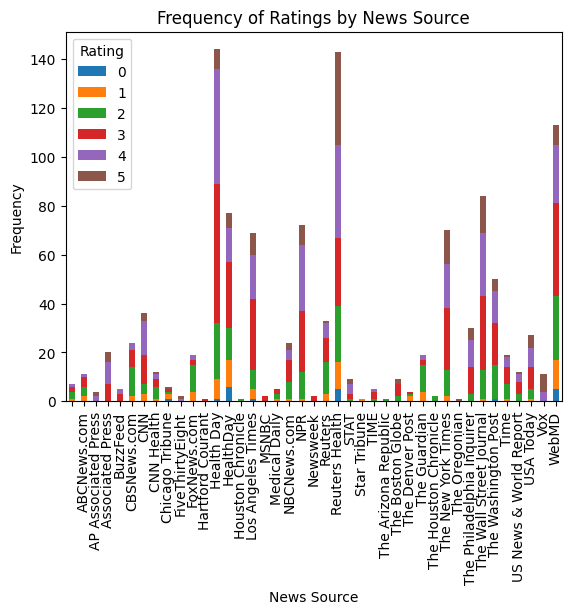

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Group by 'news_source' and 'rating', and count occurrences
merged_counts = merged_df.groupby(['news_source', 'rating']).size().unstack(fill_value=0)

# Step 2: Plot the bar chart
plt.figure(figsize=(30, 20))
merged_counts.plot(kind='bar', stacked=True)
plt.xlabel('News Source')
plt.ylabel('Frequency')
plt.title('Frequency of Ratings by News Source')
plt.legend(title='Rating')
plt.show()


## Frequency of Labels

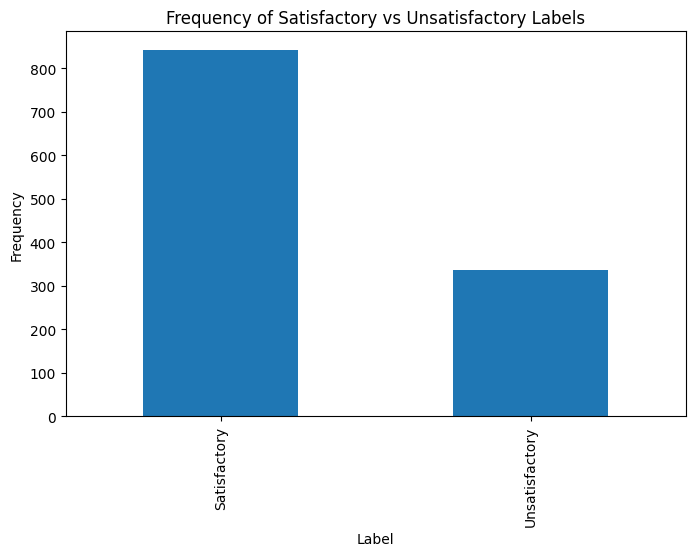

In [ ]:
# Frequency of labels

# Step 1: Group by 'category' and 'rating', and count occurrences
filtered_counts = filtered_df['label'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
filtered_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Frequency of Satisfactory vs Unsatisfactory Labels')
plt.show()


## Word Count Distribution

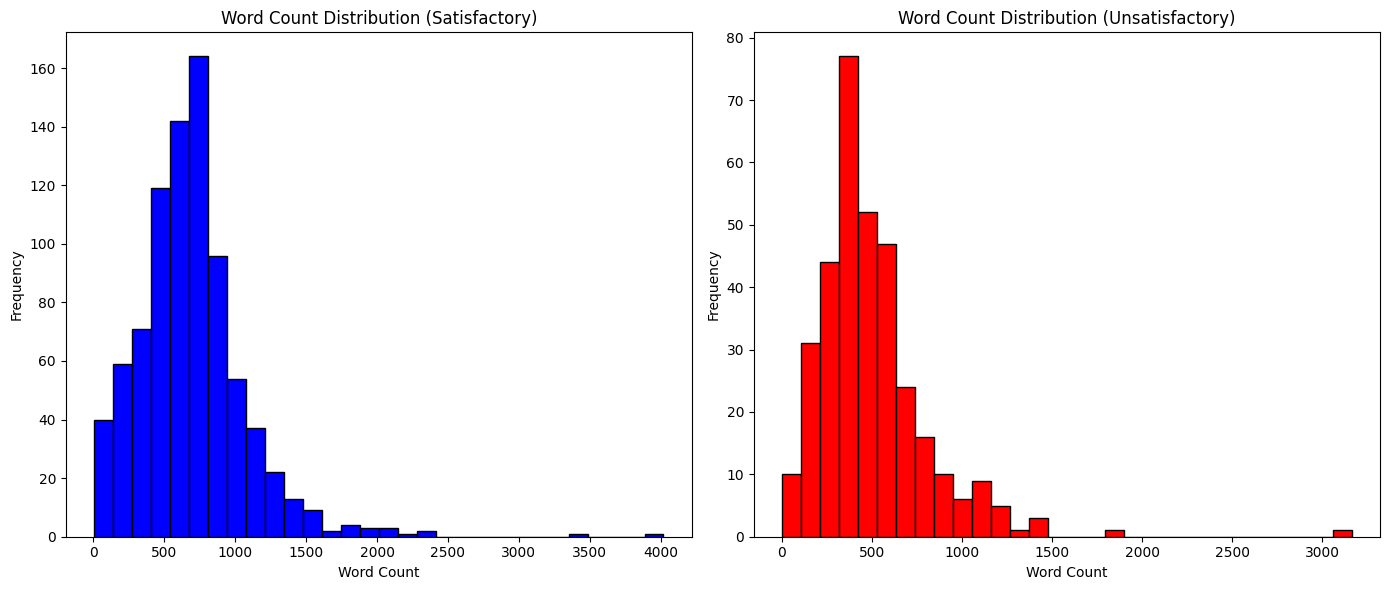

In [ ]:
import matplotlib.pyplot as plt

# Calculate the word count for each article
filtered_df['word_count'] = filtered_df['text'].apply(lambda x: len(str(x).split()))

# Group the data by labels
satisfactory_word_counts = filtered_df[filtered_df['label'] == 'Satisfactory']['word_count']
unsatisfactory_word_counts = filtered_df[filtered_df['label'] == 'Unsatisfactory']['word_count']

# Create separate histograms for each label
plt.figure(figsize=(14, 6))

# Histogram for 'Satisfactory'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(satisfactory_word_counts, bins=30, color='blue', edgecolor='black')
plt.title('Word Count Distribution (Satisfactory)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Histogram for 'Unsatisfactory'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(unsatisfactory_word_counts, bins=30, color='red', edgecolor='black')
plt.title('Word Count Distribution (Unsatisfactory)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()



In [ ]:
# Calculate mean and standard deviation (Satisfactory word count)
mean_sat_word_count = satisfactory_word_counts.mean()
std_sat_word_count = satisfactory_word_counts.std()
median_sat_word_count = satisfactory_word_counts.median()

# Print the results
print(f'Mean Sat Word Count: {mean_sat_word_count}')
print(f'Standard Deviation of Sat Word Count: {std_sat_word_count}')
print(f'Median of Sat Word Count: {median_sat_word_count}')

###

# Calculate mean and standard deviation (Unsatisfactory word count)
mean_unsat_word_count = unsatisfactory_word_counts.mean()
std_unsat_word_count = unsatisfactory_word_counts.std()
median_unsat_word_count = unsatisfactory_word_counts.median()

# Print the results
print(f'Mean unsat Word Count: {mean_unsat_word_count}')
print(f'Standard Deviation of unsat Word Count: {std_unsat_word_count}')
print(f'Median unsat Word Count: {median_unsat_word_count}')



Mean Sat Word Count: 690.4804270462633
Standard Deviation of Sat Word Count: 384.8967354294334
Median of Sat Word Count: 668.0
Mean unsat Word Count: 499.54302670623144
Standard Deviation of unsat Word Count: 311.5722400856699
Median unsat Word Count: 433.0


In [ ]:
filtered_df.head()

,url,title_x,text,rating,tags,criteria,source_link,news_source,normalized_text,label,label_encoded,word_count
0,http://www.wsj.com/articles/powdered-ginger-ma...,Powdered Ginger May Ease Seasonal Allergy Symp...,Adding small amounts of powdered ginger to foo...,4,"[allergies, ginger, mice studies, rhinitis]",[{'question': 'Does the story adequately discu...,http://www.wsj.com/articles/powdered-ginger-ma...,The Wall Street Journal,adding small amounts of powdered ginger to foo...,Satisfactory,0,374
1,http://articles.latimes.com/2010/sep/08/news/l...,"Nothing much works for morning sickness, study...",Morning sickness can be one of the most misera...,2,[],[{'question': 'Does the story adequately discu...,http://articles.Los Angeles Times.com/2010/sep...,Los Angeles Times,morning sickness can be one of the most misera...,Unsatisfactory,1,483
2,http://consumer.Healthday.com/Article.asp?AID=...,Aggressive Treatment May Be Beneficial for Ear...,En Español\n\nBy Amanda Gardner\n\nHealthDay R...,5,[prostate cancer],[{'question': 'Does the story adequately discu...,http://consumer.Healthday.com/Article.asp?AID=...,Health Day,en espaol by amanda gardner healthday reporter...,Satisfactory,0,675
3,https://consumer.healthday.com/bone-and-joint-...,A Surgery-Free Fix for Bad Knees?,En Español\n\nBy Dennis Thompson\n\nHealthDay ...,3,[knee osteoarthritis],[{'question': 'Does the story adequately discu...,https://consumer.healthday.com/bone-and-joint-...,Health Day,en espaol by dennis thompson healthday reporte...,Satisfactory,0,630
4,http://vitals.nbcnews.com/_news/2013/03/19/173...,"Therapy often as good as surgery for knees, st...",You might not want to rush into knee surgery. ...,4,"[Knees, surgery, therapy]",[{'question': 'Does the story adequately discu...,http://vitals.nbcnews.com/_news/2013/03/19/173...,AP Associated Press,you might not want to rush into knee surgery p...,Satisfactory,0,714


<ipython-input-21-bf60bc065ba5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='word_count', data=boxplot_data, palette='Set2')


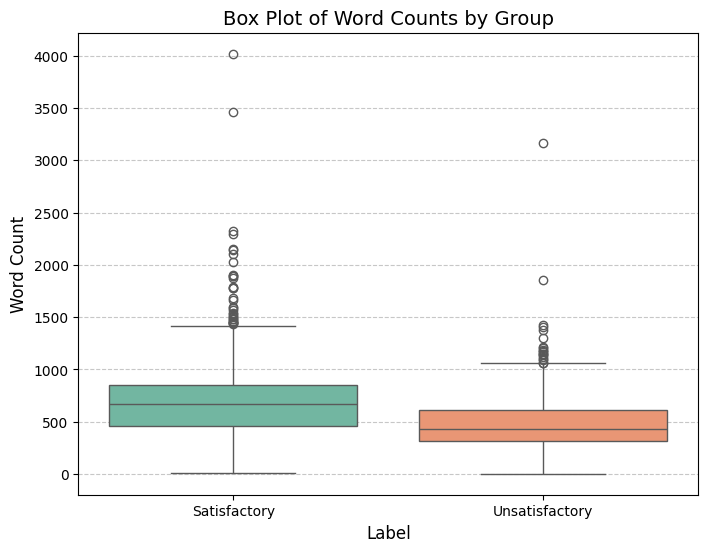

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine data for plotting
boxplot_data = filtered_df[['label', 'word_count']]

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='word_count', data=boxplot_data, palette='Set2')

# Add labels and title
plt.title('Box Plot of Word Counts by Group', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


### T-Test of Independence

In [ ]:
import pandas as pd
from scipy.stats import levene

# Perform Levene's test
stat, p_value = levene(satisfactory_word_counts, unsatisfactory_word_counts)

# Display results
print(f"Levene's Test Statistic: {stat:.4f}, P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in variances. Groups have unequal variances.")
else:
    print("No significant difference in variances. Groups have equal variances.")


Levene's Test Statistic: 11.0386, P-value: 0.0009
Significant difference in variances. Groups have unequal variances.


In [ ]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(satisfactory_word_counts, unsatisfactory_word_counts, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 8.865965412369258, P-value: 5.358711736741076e-18


## Comparison Words/Words of Uncertainty

### Adding a column with counts of words of uncertainty and comparison words

In [ ]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Initialize the NLTK Porter Stemmer
stemmer = PorterStemmer()

# Define the list of uncertain words
uncertain_words = ['could', 'may', 'might', 'should', 'would', 'more', 'less']

# Stem modal words for consistency
stemmed_uncertain_words = [stemmer.stem(word) for word in uncertain_words]

# Stem text
filtered_df['stemmed_text'] = filtered_df['normalized_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Define a function to count modal words in text
def count_uncertain_words_stemming(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Stem each token
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Count how many stemmed tokens match the stemmed modal words
    uncertain_count = sum(1 for word in stemmed_tokens if word in stemmed_uncertain_words)

    return uncertain_count

# Apply the function to the 'text' column to create a new 'uncertain_word_count' column
filtered_df['uncertain_word_count'] = filtered_df['stemmed_text'].apply(count_uncertain_words_stemming)

# Display the first few rows to verify
print(filtered_df[['stemmed_text', 'uncertain_word_count']].head())


                                        stemmed_text  uncertain_word_count
0  ad small amount of powder ginger to food may h...                     2
1  morn sick can be one of the most miser part of...                     1
2  en espaol by amanda gardner healthday report w...                    12
3  en espaol by denni thompson healthday report t...                     5
4  you might not want to rush into knee surgeri p...                    11


In [ ]:
stemmed_uncertain_words

['could', 'may', 'might', 'should', 'would', 'more', 'less']

### Welch's t-test of independence

In [ ]:
from scipy.stats import ttest_ind

# Split the counts by class
satisfactory_uncertain_counts = filtered_df[filtered_df['label'] == 'Satisfactory']['uncertain_word_count']
unsatisfactory_uncertain_counts = filtered_df[filtered_df['label'] == 'Unsatisfactory']['uncertain_word_count']

# Perform Welch's t-test
t_stat, p_value = ttest_ind(satisfactory_uncertain_counts, unsatisfactory_uncertain_counts, equal_var=False)

# Display the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in the number of modal words between the two classes.")
else:
    print("There is no significant difference in the number of modal words between the two classes.")


T-Statistic: 8.585907688022248
P-Value: 4.530517253585223e-17
There is a significant difference in the number of modal words between the two classes.
